In [203]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [204]:
# File to Load (Remember to Change These)
nyc_airbnb_load = "Resources/listings.csv"
nyc_airbnb_data=pd.read_csv(nyc_airbnb_load)

In [205]:
nyc_airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2515,Stay at Chez Chic budget room #1,2758,Steph,Manhattan,Harlem,40.799205,-73.953676,Private room,59,2,170,2018-07-05,1.42,3,317
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647486,-73.972370,Private room,149,1,8,2018-07-17,0.25,9,365
2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,1,34,2018-06-29,0.32,2,352
3,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.708558,-73.942362,Private room,70,5,33,2018-06-15,0.32,3,294
4,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809018,-73.941902,Private room,150,3,0,NaN,NaN,1,365


In [206]:
nyc_airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [207]:
nyc_airbnb_clean = nyc_airbnb_data.drop(columns=['name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 
                                                 'minimum_nights', 'last_review', 'calculated_host_listings_count', 
                                                 'availability_365'])
nyc_airbnb_clean.head()

,id,neighbourhood_group,room_type,price,number_of_reviews,reviews_per_month
0,2515,Manhattan,Private room,59,170,1.42
1,2539,Brooklyn,Private room,149,8,0.25
2,2595,Manhattan,Entire home/apt,225,34,0.32
3,3330,Brooklyn,Private room,70,33,0.32
4,3647,Manhattan,Private room,150,0,NaN


In [208]:
nyc_airbnb_clean.fillna(0).head()

,id,neighbourhood_group,room_type,price,number_of_reviews,reviews_per_month
0,2515,Manhattan,Private room,59,170,1.42
1,2539,Brooklyn,Private room,149,8,0.25
2,2595,Manhattan,Entire home/apt,225,34,0.32
3,3330,Brooklyn,Private room,70,33,0.32
4,3647,Manhattan,Private room,150,0,0.00


In [209]:
nyc_airbnb_clean["market_length"] = round((nyc_airbnb_clean["number_of_reviews"]/nyc_airbnb_clean["reviews_per_month"]), -2)

In [210]:
nyc_airbnb_clean.fillna(0).head()

,id,neighbourhood_group,room_type,price,number_of_reviews,reviews_per_month,market_length
0,2515,Manhattan,Private room,59,170,1.42,100.0
1,2539,Brooklyn,Private room,149,8,0.25,0.0
2,2595,Manhattan,Entire home/apt,225,34,0.32,100.0
3,3330,Brooklyn,Private room,70,33,0.32,100.0
4,3647,Manhattan,Private room,150,0,0.00,0.0


In [211]:
nyc_airbnb_clean["market_length_yr"] = (nyc_airbnb_clean["market_length"]/12)

In [212]:
nyc_airbnb_clean.fillna(0).head()

,id,neighbourhood_group,room_type,price,number_of_reviews,reviews_per_month,market_length,market_length_yr
0,2515,Manhattan,Private room,59,170,1.42,100.0,8.333333
1,2539,Brooklyn,Private room,149,8,0.25,0.0,0.000000
2,2595,Manhattan,Entire home/apt,225,34,0.32,100.0,8.333333
3,3330,Brooklyn,Private room,70,33,0.32,100.0,8.333333
4,3647,Manhattan,Private room,150,0,0.00,0.0,0.000000


In [213]:
market_length_airbnb = nyc_airbnb_clean.drop(columns=['price','number_of_reviews','reviews_per_month','id','market_length_yr']).dropna()

In [214]:
print(market_length_airbnb)

      neighbourhood_group        room_type  market_length
0               Manhattan     Private room          100.0
1                Brooklyn     Private room            0.0
2               Manhattan  Entire home/apt          100.0
3                Brooklyn     Private room          100.0
5                Brooklyn  Entire home/apt            0.0
6               Manhattan  Entire home/apt            0.0
7               Manhattan  Entire home/apt          100.0
8               Manhattan  Entire home/apt          100.0
9               Manhattan     Private room          100.0
10              Manhattan     Private room          100.0
11              Manhattan  Entire home/apt          100.0
12              Manhattan  Entire home/apt          100.0
13              Manhattan  Entire home/apt          100.0
14              Manhattan     Private room          100.0
15               Brooklyn     Private room          100.0
16              Manhattan     Private room          100.0
17            

In [215]:
market_length_airbnb.head()

,neighbourhood_group,room_type,market_length
0,Manhattan,Private room,100.0
1,Brooklyn,Private room,0.0
2,Manhattan,Entire home/apt,100.0
3,Brooklyn,Private room,100.0
5,Brooklyn,Entire home/apt,0.0


In [216]:
market_length_airbnb = market_length_airbnb.rename(columns={'market_length':'Market Length'})

In [217]:
market_length_airbnb = market_length_airbnb.rename(columns={'neighbourhood_group':'Neighbourhood Group'})

In [225]:
market_length_airbnb.head()

,Neighbourhood Group,room_type,Market Length
0,Manhattan,Private room,100.0
1,Brooklyn,Private room,0.0
2,Manhattan,Entire home/apt,100.0
3,Brooklyn,Private room,100.0
5,Brooklyn,Entire home/apt,0.0


In [226]:
x = ['Market Length']
y = ['Neigbourhood Group']

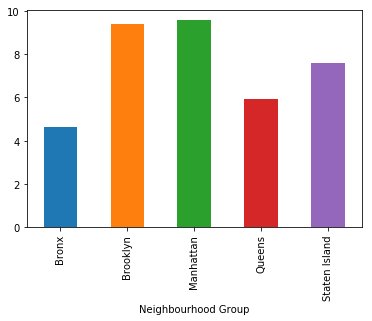

In [233]:
market_length_airbnb.groupby('Neighbourhood Group')['Market Length'].mean().plot(kind='bar')
plt.show()

In [ ]:
plt.xticks(tick_locations, y[""], rotation="vertical")